<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Dimensionality-Reduction-Techniques/blob/main/DimensionalityReduction_For_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I have used the digits image dataset for all dimensionality reduction technique**

In [182]:
# Importing dataset
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns
from sklearn import datasets
digits = load_digits()
digits.data.shape

(1797, 64)

This dataset contains data 8x8 pixel images, that makes them 64 dimensional data. 

# **1. PCA for Dimentionality Reduction**

PCA as an unsupervised linear dimensionality reduction technique that helps us identify patterns in data based of the correlation between the features. 

PCA aims to find the directions of the maximum variance in high dimensional data and project it onto a lower dimensional feature space.
To get some information from this dataset I will reduce the dimensions to 2 dimensions using PCA.

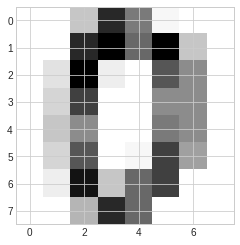

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Visualizing a sample image to view
# This image is in the form of numpy array.
image_sample = digits.data[0,:].reshape(8,8)
plt.imshow(image_sample)

## Reducing the Image Dimension using PCA

In [185]:
# Importing required modules
from sklearn.decomposition import PCA
# I need 2 principal components.
pca = PCA(2) 
converted_data = pca.fit_transform(digits.data)
converted_data.shape

(1797, 2)

As per the above PCA implementation the dimension is reduced from 64 to 2.

### Visualizing the resultant dataset

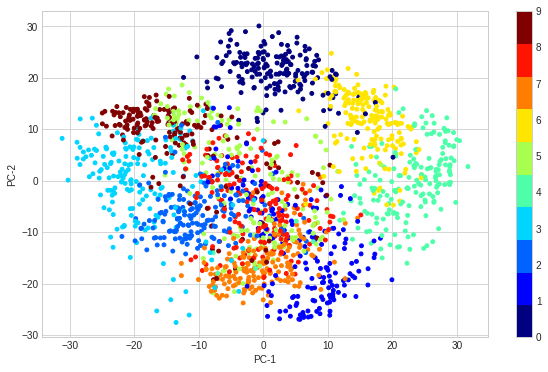

In [188]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

So from the result we can infer that, earlier these data points were in 64 dimension, now each data point is plotted in 2-dimensional along the direction of the highest variance, which us the goal of PCA: to increase variance and reduce covariance between the features. Eventually we have found the optimal strech and rotation in 64 dimensional space that allowed us to see the ayout of the digits in two dimensions.

One of the vital step in PCA process is to find out the number if principal component to be derived in the result. To determine this I have used the cumulative explained variance ratio as a function of the number of components:

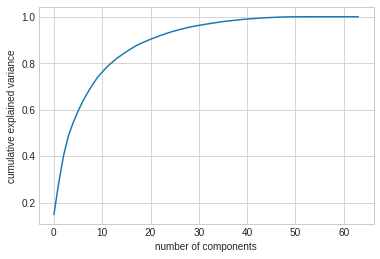

In [187]:
# Plotting cumulative explained variance against the number of components 
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This plot shows how much of the total, how much variance of the 64 dimension dataset is covered in the first N components. For instance, its clear that with the digits the first 10-11 components contains approximately 75% of the variance, while we need around 45-50 components to describe close to 100% of the variance. When the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

In this case, nonlinear manifold embeddings like LLE and Isomap can be helpful like the present dataset.

So two-dimensional projection loses a lot of information (as shown by the explained variance) and that we'd need about 20 components to retain 90% of the variance. This plot can be used for a high-dimensional dataset to understand the level of redundancy present in multiple observations.

# **2. SVD for Dimentionality Reduction**

SVD is also a linear dimensionality reduction technique.
Very similar to PCA, but it doesn't center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [189]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
# Using the same dataset 
# Prints top 10 rows of dataset
digits = load_digits()
digits.data.shape

(1797, 64)

### Applied SVD, here u and v are singular vectors and s is singular value.

In [190]:
encoder = LabelEncoder()
u, s, v = np.linalg.svd(digits.data,full_matrices=True)

In [ ]:
u.shape

(1797, 1797)

In [191]:
s.shape

(64,)

In [192]:
v.shape

(64, 64)

### Here I have analyzed and plotted the variance explained by each singular vector in a bar graph.

Text(0, 0.5, 'Percent of the variance explained')

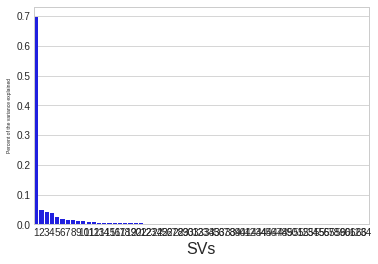

In [193]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
#plt.figure(figsize=(15,15))
plt.ylabel('Percent of the variance explained', fontsize=5)

Creating the new dataframe which contains the 2 singular vectors and the metadata.

### Creating the new dataframe which contains the 2 singular vectors and the metadata.

In [194]:
data_x=digits.data
data_y=digits.target
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=data_y.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,0.020911,-0.002103
1,1,0.025320,0.013866
2,2,0.025456,0.012195
3,3,0.020581,-0.028023
4,4,0.018577,0.041213


So now the dimensions are reduced to 2 components.

# **3. Dimensionality Reduction Using LLE**

LLE is an unsupervised and non-linear dimensionality reduction technique that creates an embedding of the dataset and tries to preserve the relationships between neighborhoods in the dataset.

LLE can be thought of as a series of local PCAs that are globally compared to find the best non-linear embedding.
When the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful.

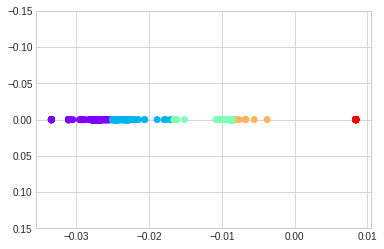

In [196]:
# I am using same digits dataset for this technique
from sklearn.manifold import LocallyLinearEmbedding
# here I have set the number of components to be derived as 2 and applied LLE
lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_transformed=lle.fit_transform(digits.data)
#Plotting the resultant components
fig, ax = plt.subplots()
colorize = dict(c=X_transformed[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# **4. Dimensionality reduction T-SNE Technique**

T-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensional reduction algorithm used for exploring high-dimensional data. t-SNE maps maps multi-dimensional data to two or more dimensions that are suitable for human observation.
PCA and T-SNE are different since PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear manifold structures. Manifold structure has any geometric shape like: cylinder, ball, curve, etc.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

In [197]:
# Implementing t-SNE.
from sklearn.manifold import TSNE
# here I have set the number of components to be derived as 2 
# I have used the same wine dataset for this technique
scaler = StandardScaler()
X_features = scaler.fit_transform(data_x)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results1 = tsne.fit_transform(X_features)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.016s...
[t-SNE] Computed neighbors for 1797 samples in 0.436s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 2.539817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.285568
[t-SNE] KL divergence after 300 iterations: 1.017278


In [199]:
tsne_results1

array([[-16.819424  ,  -4.251229  ],
       [  0.83288115,   7.800353  ],
       [ -4.7827873 ,   1.7452724 ],
       ...,
       [ -0.8232631 ,   2.534921  ],
       [  3.477799  , -12.534755  ],
       [ -1.3238195 ,  -0.2993164 ]], dtype=float32)

### Creating a dataframe featuring the two principal components that we acquired through t-SNE.

In [200]:
tsne_dataset1 = pd.DataFrame(data = tsne_results1, columns = ['component1', 'component2'] )
tsne_dataset1.head()

,component1,component2
0,-16.819424,-4.251229
1,0.832881,7.800353
2,-4.782787,1.745272
3,0.423971,-8.149239
4,1.783193,14.025270


<Figure size 432x288 with 0 Axes>

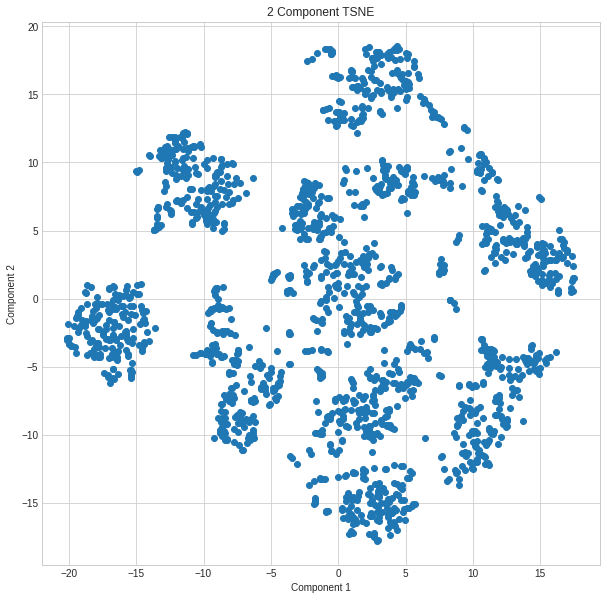

In [201]:
# Extracting the two features from above in order to add them to the dataframe.
tsne_component1 = tsne_dataset1['component1']
tsne_component2 = tsne_dataset1['component2']
# Visualizing the effects of the T-distributed Stochastic Neighbour Embedding.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_component1, tsne_component2)

The above result shows that this technique preserves the small pairwise distance or local similarity and hence the information is preserved for high dimensional datasets.

# **5. Isometric mapping(ISOMAP) for Dimensionality Reduction**

It is a non linear dimensionality reduction technique. The steps involved in it are as follow:
1.   First the nearest neighbours of each point and create a weighted graph by connecting each point to its nearest neighbour. The nodes in the graph are the data points and the weights are the distance between them.
2.   Now redefine the distance between the points to be the lenghth of the shortest path between 2 points in the neighbourhood graph.
3. Lastly Apply MDS to the newly created distance matrix.



In [202]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.utils import resample
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn import manifold

# Using the same Digits dataset
# Checking the shape of the image dataset
digits = load_digits()
digits.images.shape

(1797, 8, 8)

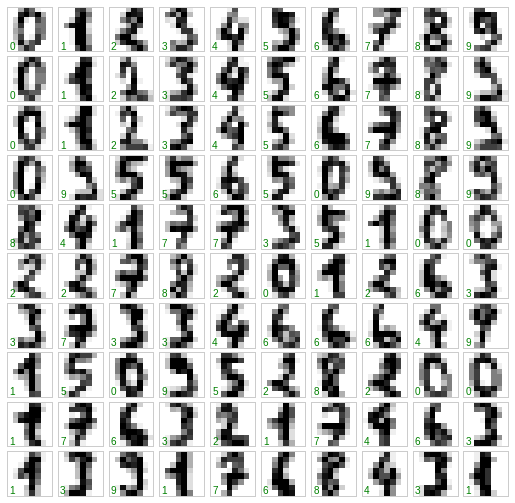

In [203]:
# Plotting the images in the dataset using subplots.
fig,ax =plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,axes in enumerate(ax.flat):
  axes.imshow(digits.images[i],cmap='binary')
  axes.text(0.05,0.05,str(digits.target[i]),transform=axes.transAxes,color='green')

Assigning Input (data_x) and Output (data_y) variables.
1.   Here data_x is input variable and the output variable is data_y also called class label




In [204]:
data_x=digits.data
data_y=digits.target

Applying Isomap for 2 components

In [205]:
model=manifold.Isomap(n_components=2).fit_transform(data_x)

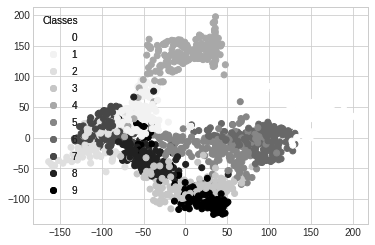

In [206]:
fig, ax = plt.subplots()
scatter = ax.scatter(model[:,0],model[:,1], c=data_y, )
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)


The above plot shows the data points in 2 dimensional space against the class variable which ranges from 0-9 in this dataset.


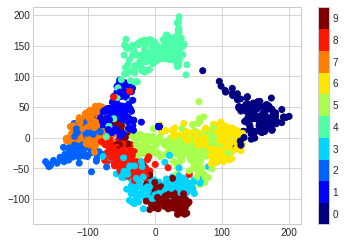

In [207]:
plt.scatter(model[:, 0], model[:, 1], c=data_y, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

The resulting scatter plot shows some of the relationships between the data points, but is a bit crowded.

# **6. Uniform Manifold Approximation and Projection (UMAP) for Dimensionality Reduction**

Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime.

In [208]:
# Implementing UMAP.
# installing umap package
!pip install umap-learn

In the below code:
1.   n_neighbors determines the number of neighboring points used.
2.   min_dist controls how tightly embedding is allowed. Larger values ensure embedded points are more evenly distributed.




In [209]:
import umap
# This is converting the data into low dimension 
x = digits.data
y = digits.target
embedding = umap.UMAP(n_components=2,n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation')
umap_model = embedding.fit_transform(x)
%time u = umap_model

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


The above embedding is the 2 dimension representation of the dataset.

In [212]:
component1_umap = umap_model[:,0]
component2_umap = umap_model[:,1]

<Figure size 432x288 with 0 Axes>

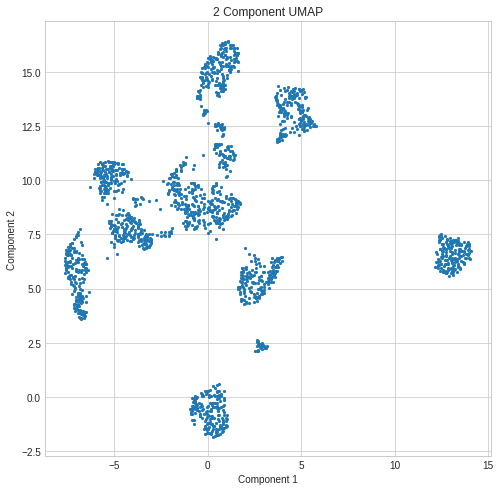

In [213]:
# Visualized the effects of the Uniform Manifold Approximation and Projection.
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(component1_umap, component2_umap,cmap="Spectral", s=4.5)

The above graph shows the 2 components which are the result of the dimensionality reduction.

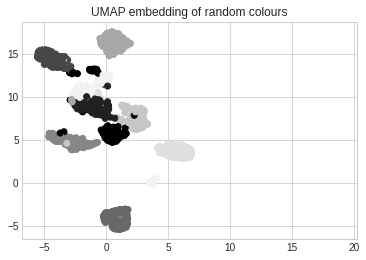

In [161]:
# Plotting the points in 2-d with respect to target variable
plt.scatter(umap_model[:,0], umap_model[:,1], c=y)
plt.title('UMAP embedding of random colours');

In the above graph the data is placed in 2 dimensional space, i-e the points that were close in 4-dimensional space are kept close together. 
In the above graph the data is placed in 2 dimensional space, i-e the points that were close in 4-dimensional space are kept close together. There is very less correlation between the transformed variables. By comparing the results of T_SNE and UMAP its clear that the correlation between components is less in UMAP and also often provide a better big picture view of the data as well as preserving local neighbor relations.